In [1]:
%matplotlib inline
from numpy import *
import numpy as np
from matplotlib.pyplot import *

# Formule de Simpson

In [2]:
def simpson(f, a, b, N):
    delta_x = (b-a)/N
    x = a + arange(N)*delta_x
    return np.sum(delta_x * (f(x) + 4*f(x+delta_x/2) + f(x+delta_x))/6)

simpson(lambda x:1/(1+x**2), 0, 1, 100)

0.78539816339744817

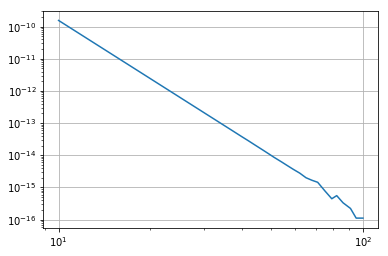

In [3]:
N_list=logspace(1,2,dtype=int)

l=[simpson(lambda x:1/(1+x**2), 0, 1, N) for N in N_list]
l=array(l)
loglog(N_list,abs(l-pi/4))
grid()

# Loi de Poisson

In [4]:
fichier="100secondes_200us_count.txt"
data=loadtxt(fichier, dtype=int)
duree_mesure=100
nombre_moyen_photons=np.sum(data)/duree_mesure
print(nombre_moyen_photons)

22972.79


In [5]:
h = 6.6E-34
c = 3E8
lamb = 550E-9
nombre_moyen_photons * h * c / lamb

8.2702044000000002e-15

In [6]:
print(std(data))
print(sqrt(data.mean()))

2.14011560076
2.14349201072


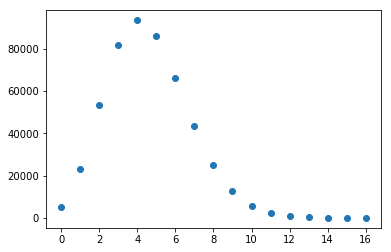

In [7]:
nbr_photon,occurence = unique(data,return_counts=True)
plot(nbr_photon,occurence,'o')

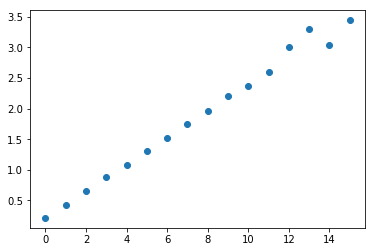

In [8]:
plot(occurence[:-1]/occurence[1:], 'o')

In [9]:
N = len(data)
data_2 = data.reshape((N//2, 2)).sum(axis=1)

In [10]:
print(data.mean())
print(data_2.mean())

4.594558
9.189116


In [11]:
print(data.std()**2)
print(data_2.std()**2)

4.58009478464
9.11176713854


In [12]:
def moyenne_par_paquet(data, N):
    len_data = len(data)
    M = len_data//N
    return data[-(M*N):].reshape((M, N)).sum(axis=1)

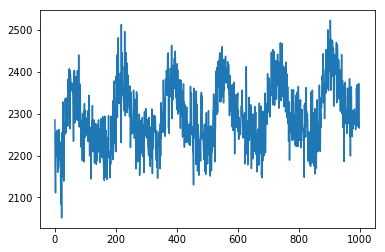

In [13]:
plot(moyenne_par_paquet(data, 500))

In [17]:
def generateur_aleatoire(data):
    for a, b in zip(data[::2], data[1::2]):
        if a>b:
            yield 1
        elif a<b:
            yield 0
            
x = generateur_aleatoire(data)
#print(list(x))

%timeit list(generateur_aleatoire(data))

10 loops, best of 3: 51.3 ms per loop


In [31]:
def generateur_aleatoire_numpy(data):
    data = data[:2*(len(data)//2)]
#    a = zeros(len(data)//2)
    mask1 = data[::2]!=data[1::2]
    mask2 = data[::2]>data[1::2]
#    a[mask2]=1
    return np.array(mask2[mask1], dtype=int)
%timeit list(generateur_aleatoire_numpy(data))

100 loops, best of 3: 12 ms per loop


In [32]:
bit_aleatoires = generateur_aleatoire_numpy(data)

In [36]:
N = 11
ligne1 = bit_aleatoires[:11]
ligne1
coef = 1/(2**arange(1, N+1))
(ligne1*coef).sum()

0.4345703125

In [42]:
N = 11
n_bits = len(bit_aleatoires)
M = n_bits//N # nb de nombre réels
a = bit_aleatoires[-N*M:].reshape((M, N))

coef = 1/(2**arange(1, N+1))
b = (a*coef).sum(axis=1)

In [43]:
X = b[::2]
Y = b[1::2]
X = X[:len(Y)]

4*np.mean(X**2 + Y**2 < 1)

3.1693057247259442

In [85]:
import numba

@numba.vectorize
def mandel(c, N_iter_max=100):
    z = 0
    for n in range(N_iter_max):
        if abs(z)>2:
            return n
        z = z**2 + c
    return 0

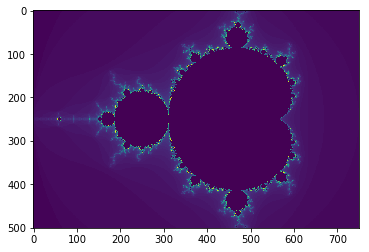

In [86]:
x = linspace(-2, 1, 751)
y = linspace(-1, 1, 501)
X, Y = meshgrid(x, y)
C = X + 1J*Y
imshow(mandel(C, 100))

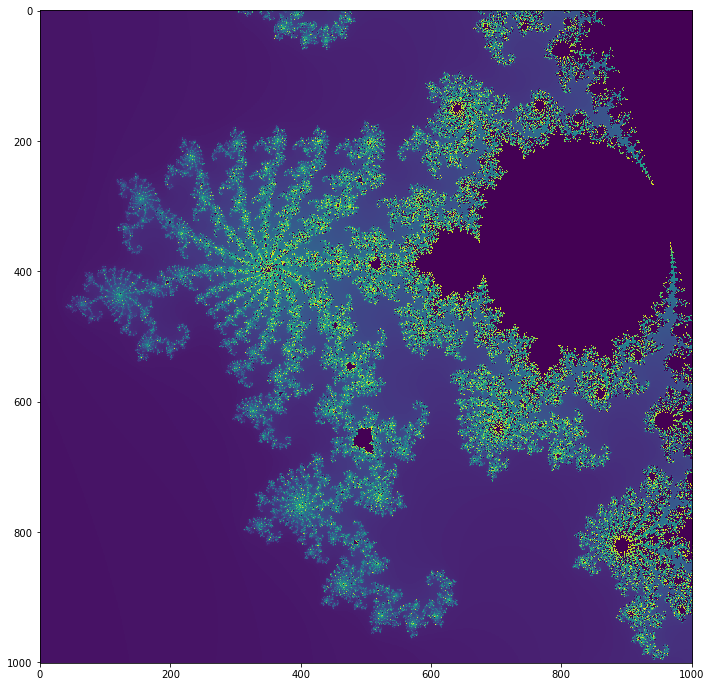

In [87]:
figure(figsize=(12, 12))
x = linspace(-0.749, -0.716, 1001)
y = linspace(-0.196, -0.227, 1001)
X, Y = meshgrid(x, y)
C = X + 1J*Y
imshow(mandel(C, 300))

In [84]:
%timeit mandel(C, 300)

1 loop, best of 3: 461 ms per loop
